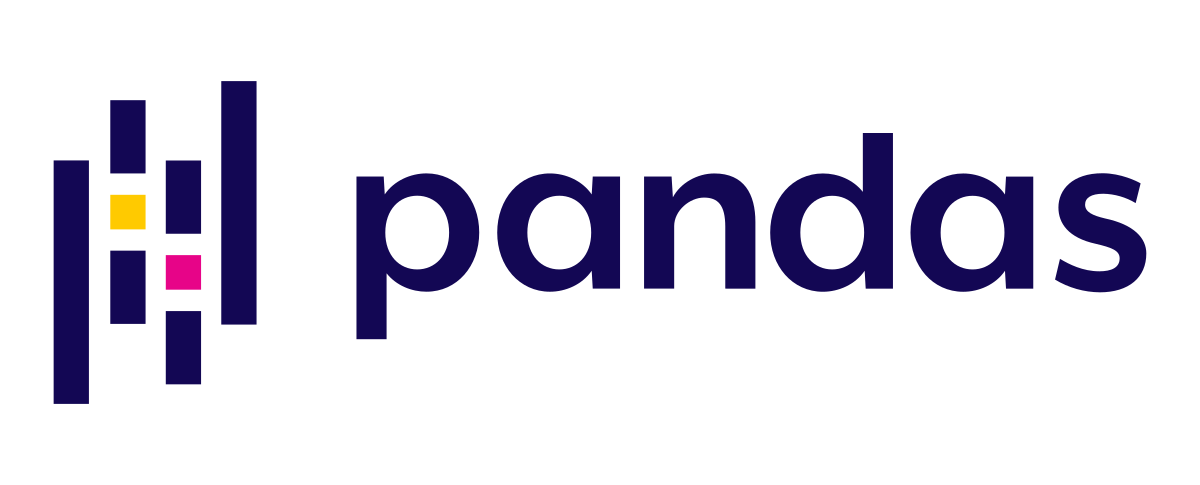

### What is pandas?

* Pandas is a Python library used for working with data sets.
* It has functions for analyzing, cleaning, exploring and manipulating data.

### File Read Write operations

In [2]:
#importing pandas 
import pandas as pd


In [4]:
draft1 = pd.read_csv("ex1.csv")#supply the file name (path)
draft1

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [5]:
#the type of the draft1 is dataFrame
#DataFrame is nothing but the tabular structure of the data
type(draft1)

pandas.core.frame.DataFrame

 * Default delimiter for a csv is ',' 
 * In case if the delimiter is anyting else apart from ',' then we can use the parameter sep="sepeartor" when reading the file  eg: pd.read_csv('filename.csv',<strong>sep="seperator"</strong>
 * Incase if we dont mention seperator then all the the data will come in only one column

1. <strong>draft1.head()</strong> ------> Default this will read the top 5 rows in the data
2. <strong>draft1.tail()</strong>------->Default this will read the last 5 rows in the data
3. In case if there are less than 5 rows then it will read how much ever data is there in a file

In [6]:
draft1.head()

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
draft1.tail()

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


1. We can even mention custom number of rows that needs to be read from a file when using head() or tail(). 
2. This can be done by specifying the number as a function parameter


In [8]:
draft1.head(1)


,a,b,c,d,message
0,1,2,3,4,hello


In [9]:
draft1.tail(1)

,a,b,c,d,message
2,9,10,11,12,foo


1. In case if you want to see all the parameters that are allowed inside a function, place the cursor there and enter the 'tab' button

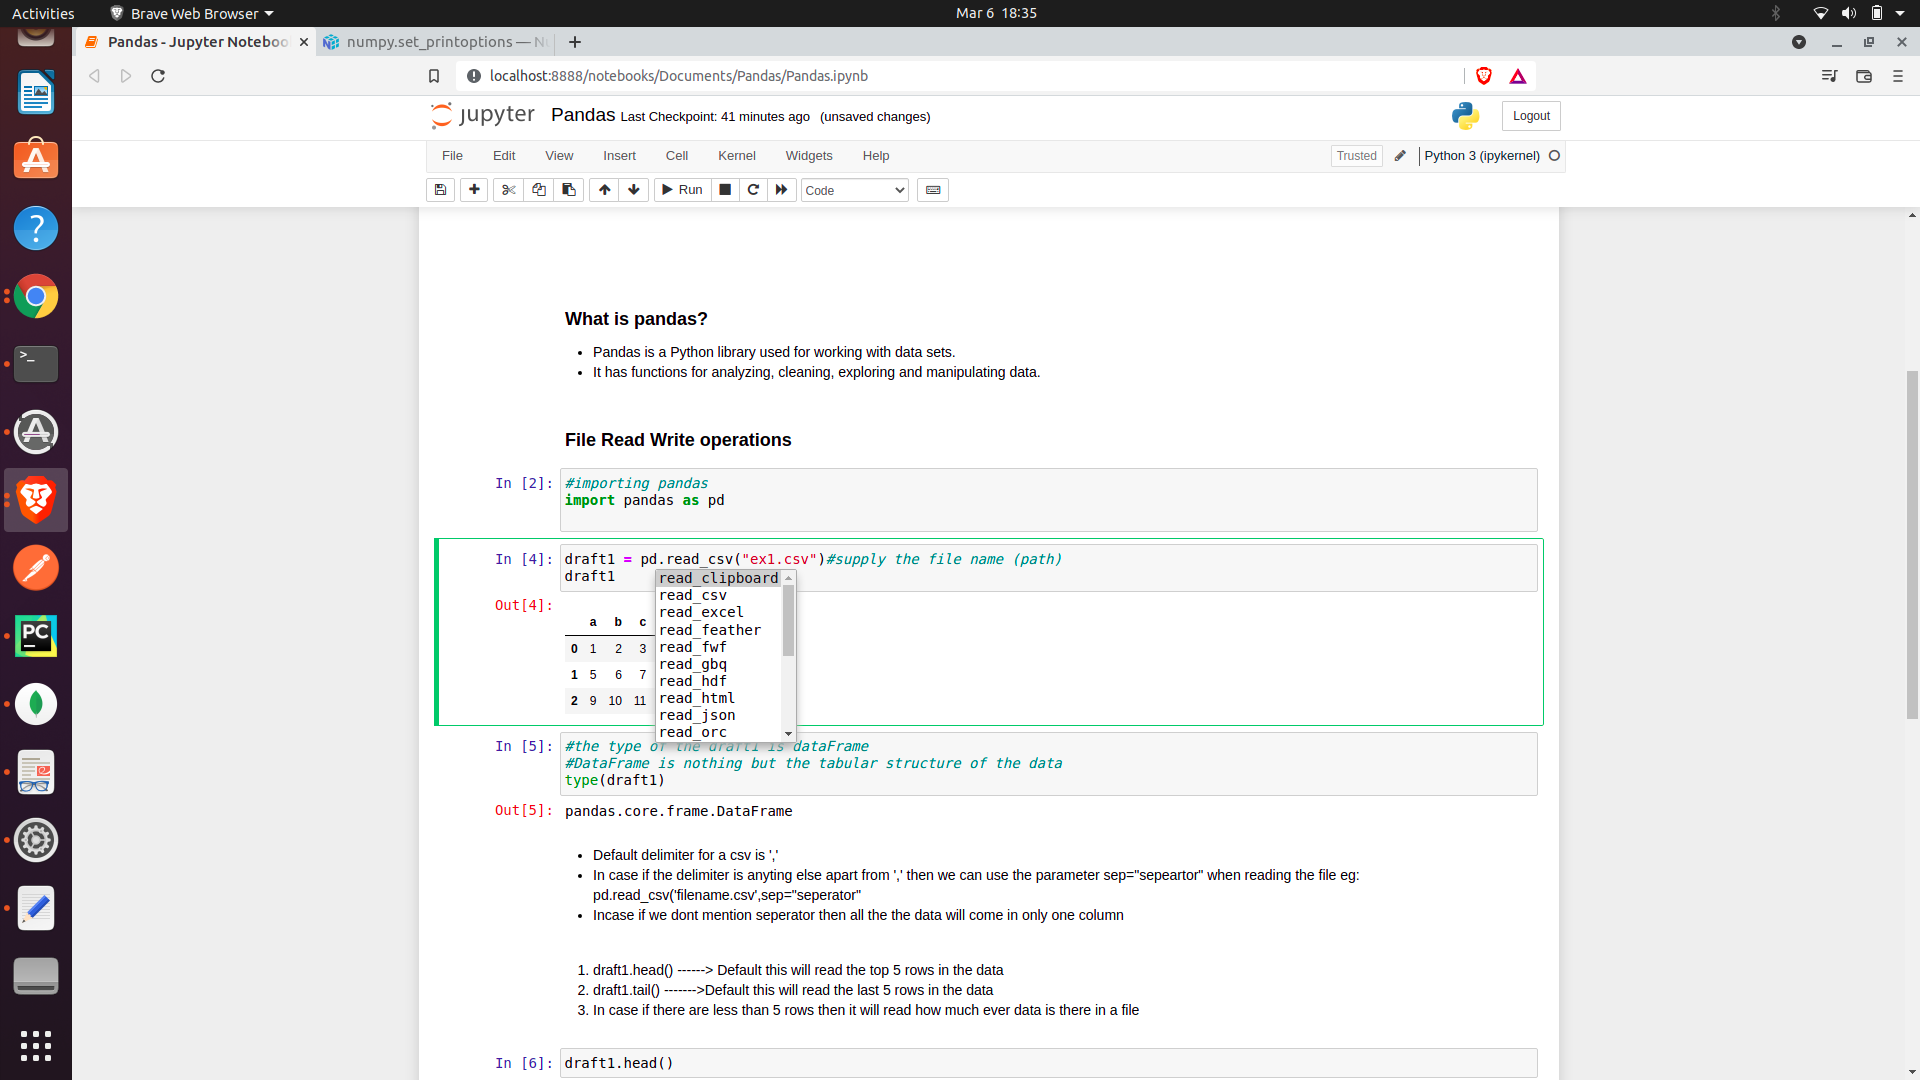

In [10]:
#Incase if you want to read a \t(tab) seperated data
draft2 = pd.read_table('test.tsv')  #Read a tsv into a dataframe
draft2

,test,test,test.1,test.2,test.3
sudh,sudh,sudh,sudh,sudh,sudh
kumar,kumar,kumar,kumar,kumar,kumar


In [12]:
#you can read tsv file even using read_csv by mentioning the sep in parameters
draft2 = pd.read_csv('test.tsv',sep="\t")
draft2

,test,test,test.1,test.2,test.3
sudh,sudh,sudh,sudh,sudh,sudh
kumar,kumar,kumar,kumar,kumar,kumar


1. Incase if you dont want consider the first row as a columns header we can specify header= None when reading the data using read_csv


In [13]:
pd.read_csv("ex2.csv",header=None)


,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


1. In case if want to mention our own column names in a dataset then we use <strong>names</strong> as parameter when reading a file 
2. Incase if number of column names are more when compared to actual number of columns then those columns will be filled with <strong>NaN(Not a Number)</strong>

In [16]:

df = pd.read_csv("ex2.csv", names=['a','b','c','d','e','f','g'])
df

,a,b,c,d,e,f,g
0,1,2,3,4,hello,NaN,NaN
1,5,6,7,8,world,NaN,NaN
2,9,10,11,12,foo,NaN,NaN


In [18]:
# Reading data with two levels
parsed = pd.read_csv('csv_mindex.csv')
parsed

,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10
5,two,b,11,12
6,two,c,13,14
7,two,d,15,16


* we try to perform multilevel indexing operation on the above data
1. In the above data we see that 'one' and 'two' in key1 are repeated 4 times.
2. When <strong>key1 is one</strong> we have a,b,c,d and when it is <strong>two</strong> we have a,b,c,d
3. Instead of writing the one four times we can write it one time and internally it will create index of indices
4. This is called hierarchical indexing
5. Here we try to perform <strong>index_col=['key1','key2']<strong>


In [23]:
#By default we have 0,1,2,3,4,...... as index. But we dont want to mention that as index and we specifiy 
#another column as indices
parsed = pd.read_csv('csv_mindex.csv',index_col=['key1','key2'])
parsed
#Here we have index inside index

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

### Skip rows

In [24]:
pd.read_csv('ex4.csv')

,,,,# hey!
a,b,c,d,message
# just wanted to make things more difficult for you,NaN,NaN,NaN,NaN
# who reads CSV files with computers,anyway?,NaN,NaN,NaN
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


1. In the above it is observed that the rows 0, 2,3 are not proper. So we can try to skip that rows using the parameter skiprows=[numbers of rows to be skipped]


In [25]:
pd.read_csv('ex4.csv', skiprows=[0,2,3])


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### Checking Null values

result = pd.read_csv('ex5.csv')
result

1. In the above we can observe that we have two null(<strong>NaN</strong>) values
2. We can use <strong>isnull(dataset)</strong> inorder to check if the value is null or not
3. This will return a boolean value as shown below

In [28]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


1. Incase if you want to read specific sheet in a given excel file then we can add a parameter named <strong>sheetname</strong> when reading the excel file


In [37]:
draft3 = pd.read_excel('practicefile.xlsx',sheet_name='Sheet3')
draft3

,qwef,Unnamed: 1,vddsx,Unnamed: 3,xaas
0,NaN,asasa,dadaxxa,NaN,NaN
1,NaN,adadfsd,NaN,casaed,w
2,sdfsdfsdf,d,gdsg,ddsgsd,NaN


### Reading html data


In [41]:
url = "http://www.basketball-reference.com/leagues/NBA_2015_totals.html"
BB_data = pd.read_html(url)
df = BB_data[0]
df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,PF,24,NYK,68,22,1287,152,331,...,.784,79,222,301,68,27,22,60,147,398
1,2,Jordan Adams,SG,20,MEM,30,0,248,35,86,...,.609,9,19,28,16,16,7,14,24,94
2,3,Steven Adams,C,21,OKC,70,67,1771,217,399,...,.502,199,324,523,66,38,86,99,222,537
3,4,Jeff Adrien,PF,28,MIN,17,0,215,19,44,...,.579,23,54,77,15,4,9,9,30,60
4,5,Arron Afflalo,SG,29,TOT,78,72,2502,375,884,...,.843,27,220,247,129,41,7,116,167,1035
5,5,Arron Afflalo,SG,29,DEN,53,53,1750,281,657,...,.841,21,159,180,101,32,5,83,108,771
6,5,Arron Afflalo,SG,29,POR,25,19,752,94,227,...,.851,6,61,67,28,9,2,33,59,264
7,6,Alexis Ajinça,C,26,NOP,68,8,957,181,329,...,.818,104,211,315,47,21,51,69,151,443
8,7,Furkan Aldemir,PF,23,PHI,41,9,540,40,78,...,.481,78,98,176,28,17,16,17,96,93
9,8,Cole Aldrich,C,26,NYK,61,16,976,144,301,...,.781,101,237,338,75,37,65,59,122,338


df.tail(10)

* <strong>Whenever you want to access single column then we can mention only one square braces and mention the column name</strong>
* <strong>Whenever you want to access multiple columns then we mention all the column names inside a list. Then only we will be able to access the data.</strong>

In [43]:
df[['MP','Tm']]

,MP,Tm
0,1287,NYK
1,248,MEM
2,1771,OKC
3,215,MIN
4,2502,TOT
...,...,...
670,2434,TOT
671,1605,MIN
672,829,BRK
673,1487,CHO


* <strong>Whenever you are reading data only from one column then the type of data is considered as series</strong>

In [44]:
type(df['MP'])

pandas.core.series.Series

* <strong> If you want the type of data to be dataframe even when we give only one column name then put [[ column name]]. Then it will be treated as dataframe<strong>

In [45]:
type(df[['MP']])

pandas.core.frame.DataFrame

### Working on titanic dataset

In [46]:
#Reading the data from github
titanic_train = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
#Reading the first 10 rows
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [48]:
#Reading a data from specified columns (Pclass,Name)
titanic_train[["Name",'Pclass']].head()

,Name,Pclass
0,"Braund, Mr. Owen Harris",3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",3


## The beauty of pandas is it will understand the datatype of a column by itself

* <strong> If you want to know the data types of all the columns in the dataset then we use dtypes</strong>

In [49]:

titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Task

In [52]:
#1.Read data with proper delimiter
data = pd.read_csv("https://raw.githubusercontent.com/akhil12028/Bank-Marketing-data-set-analysis/master/bank-additional-full.csv", sep=';')

In [53]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [54]:
#2.Print first 5 rows
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [55]:
#3.print last 2 rows
data.tail(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [60]:
#5. select one column and print its data types
data['pdays'].dtype

dtype('int64')

In [61]:
# 6. print data dtype
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [67]:
#7. check if any data is null
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [68]:
#8. Skip random rows
pd.read_csv("https://raw.githubusercontent.com/akhil12028/Bank-Marketing-data-set-analysis/master/bank-additional-full.csv",sep = ';',skiprows=[3,4,2,5])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41179,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41180,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
